# Worksheet 1: File locations and pre-processing
The exercises in this worksheet demonstrate some of the tools available for data analysis, and how to prepare PRECIS output for analysis (pre-processing). This can be time consuming for large amounts of data, so in this worksheet a small subset of data is used to easily demonstrate the steps involved. 
Future worksheets use data that has undergone pre-processing.

PRECIS output files are in PP format; a Met Office binary data format. This worksheet converts data to [NetCDF](https://www.unidata.ucar.edu/software/netcdf/) format (a standard format in climate science) so that it can be used in post processing packages such as Python and the python library [Iris](http://scitools.org.uk/iris/docs/latest/index.html).

<div class="alert alert-block alert-warning">
<b>By the end of this worksheet you should be able to:</b><br> 
- Identify and list the names of PRECIS output data in PP format using standard Linux commands.<br>
- Use basic Iris commands to load data files, and view Iris cubes. <br>
- Use Iris commands to remove the model rim, select data variables and save the output as NetCDF files.
</div>

<div class="alert alert-block alert-info">
<b>Note:</b> In the boxes where there is code or where you are asked to type code, click in the box, then press <kbd>Ctrl</kbd> + <kbd>Enter</kbd> to run the code. <br>
<b>Note:</b> An percentage sign <code>%</code> is needed to run some commands on the shell. It is noted where this is needed.<br>
<b>Note:</b> A hash <code>#</code> denotes a comment; anything written after this character does not affect the command being run. <br>
</div>

## Contents
### [1.1: Data locations and file names](#1.1) 
### [1.2: Getting started with to python and Iris](#1.2)
### [1.3: Rim removal (single file example)](#1.3)
### [1.4: Select variables](#1.4)

<a id='1.1'></a>
## 1.1 Data locations and file names

The datasets used within these worksheets are already linked to the notebook in order to provide quick and easy access for the purpose of this training. However the commands learned in this worksheet provide useful context for future work in a linux and unix scripting environment.

The dataset used in Worksheet 1 is a three year subset of monthly PRECIS output data; covering South East Asia and driven by the global climate model (GCM): HadCMQ0. It has a unique identifier code: **capha**.

**a)** Firstly, find out what location you are currently in by using the **`pwd`** command; **`pwd`** stands for **print working directory**.

In the cell below type **`%pwd`** on a new line and then press <kbd>Ctrl</kbd> + <kbd>Enter</kbd>.


In [22]:
# Type %pwd below and press 'ctrl' + 'enter'



**b)** List the contents of this directory; **`ls`** stands for **list** and using the **`-l`** option gives a longer listing with more information, such as file size and modification date. 

In the cell below type  **`%ls`** on a seperate line then press <kbd>Ctrl</kbd> + <kbd>Enter</kbd>.

In [23]:
# Type %ls and press 'ctrl' + 'enter'.

# Type %ls -l and press 'ctrl' + 'enter'.


<div class="alert alert-block alert-success">
<b>Question:</b> What is the difference between <code>ls</code> and <code>ls -l</code>?  What extra information do you see? Which file was edited most recently?
</div>

<b>Answer</b>: <br>
*...Double click here to type your answer...*


**c)** Move to the directory (i.e. folder) called `/project/precis/worksheets/data/pp/cahpa`. This directory contains monthly output data in pp format from a PRECIS experiment with RUNID *cahpa*. List the contents of the directory.

**Hint:** The `cd` command stands for _change directory_

Type your command(s) below and press <kbd>Ctrl</kbd> + <kbd>Enter</kbd>.


In [47]:
# Type your %cd [directory-path] command below and press 'ctrl' + 'enter'.

# List the contents of this directory, using a previous command. 


**d)** There are a lot of files in this directory! Now list only the files containing data for September.

Type **`%ls *sep*`** in the code block below.

In [46]:
# Type %ls *sep* and press 'ctrl' + 'enter'.


<div class="alert alert-block alert-info">
<b>Note:</b> The asterisk character <code>*</code> (also known as <i>glob</i>) matches any string within the filename
</div>

**e)** This still returns too many files to comfortably count manually. **`wc`** stands for **word count**; combining this command with **`ls`** allows us to count the number of items in that directory. 

In the cell below type  **`%ls *sep* | wc -l`** then press <kbd>Ctrl</kbd> + <kbd>Enter</kbd>.

In [61]:
# Type %ls *sep* | wc -l command below and press 'ctrl' + 'enter'


<div class="alert alert-block alert-success">
<b>Question:</b> How many pp files are in this directory, in total?
<br>How many of these pp files contain the string 'sep'; relating to September? What command fo you need to use to find this out?
</div>

<b>Answer</b>: 
<br>*Total number of pp files: 
<br>Number of September pp files:
<br>Command used to find number of september pp files:*

**f)** List all the files containing data from 1982 (i.e. all files which begin **`cahpaa.pmi2`**)

Type below **`%ls cahpaa.pmi2???.pp`**

In [ ]:
# Type %ls cahpaa.pmi2???.pp and press 'ctrl' + 'enter'.


<div class="alert alert-block alert-info">
<b>Note:</b> The question mark character <code>?</code> matches any single character
</div>

**g)** Now move up two levels in the directory tree and list the directories.

Type `cd ../..` to move up two levels in the directory tree and press <kbd>Ctrl</kbd> + <kbd>Enter</kbd> to execute the command

In [62]:
# Type %cd ../.. and press 'ctrl' + 'enter'.


<div class="alert alert-block alert-success">
<b>Question:</b> Which directory are you in now?  What else can you see in this directory?
</div>

<b>Answer</b>:<br>
*...Double click here to type your answer...*

***
<a id='1.2'></a>
## 1.2 Getting started with Python and Iris
<p><img src="img/python_and_iris.png" alt="python + iris logo" style="float: center; height: 100px;"/></p>


Python is a general purpose programming language. Python supports modules and packages, which encourages program modularity and code reuse. 


We also use the Python library [Iris](http://scitools.org.uk/iris/docs/latest/index.html), which is written in Python and is maintained by the Met Office. Iris seeks to provide a powerful, easy to use, and community-driven Python library for analysing and visualising meteorological and oceanographic data sets.

The top level object in Iris is called a <b>cube</b>. A cube contains data and metadata about a phenomenon (i.e. air_temperature). Iris implements several major format importers which can take files of specific formats and turn them into Iris cubes.


For a brief introduction to Iris and the cube formatting please read this Introduction page here: 

http://scitools.org.uk/iris/docs/latest/userguide/iris_cubes.html

For future reference please refer to the Iris website:

http://scitools.org.uk/iris/docs/latest/index.html


**h)** First, run the code-block below to **load** a file into Iris and **print** it's metadata structure. <br>

To run the code, click in the box below and press <kbd>Ctrl</kbd> + <kbd>Enter</kbd>.

In [2]:
# import the necessary modules
import iris
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import glob
import os

# this is needed so that the plots are generated inline with the code instead of a separate window
%matplotlib inline 

# this prints the version of the Iris library you are using
print(iris.__version__)

# provide the path of your sample data
sample_data = '/project/precis/worksheets/data/sample_data.nc'

# Constraint the reading to a single variable and load it into an Iris cube
cube = iris.load_cube(sample_data)

# Print the Iris cube
print(cube)

2.2.0
air_temperature / (K)               (grid_latitude: 176; grid_longitude: 176)
     Dimension coordinates:
          grid_latitude                           x                    -
          grid_longitude                          -                    x
     Scalar coordinates:
          forecast_period: 1069560.0 hours, bound=(1069200.0, 1069920.0) hours
          forecast_reference_time: 1859-12-01 00:00:00
          height: 1.5 m
          time: 1983-09-16 00:00:00, bound=(1983-09-01 00:00:00, 1983-10-01 00:00:00)
     Attributes:
          Conventions: CF-1.5
          STASH: m01s03i236
          source: Data from Met Office Unified Model
     Cell methods:
          mean: time (1 hour)


<div class="alert alert-block alert-success">
<b>Question:</b> Can you explain how our sample data we printed above relates to this picture? Is our data above a 3D or a 2D cube?
<img src="img/multi_array_to_cube.png" alt="python + iris logo" style="height: 300px"/>
</div>


<b>Answer</b>:
<br>*Is this cube 3D or 2D? 
<br>What are the cube dimensions? 
<br>How many grid boxes is the latitudinal range divided into? 
<br>What meteorological variable does this cube represent? 
<br>What unit is used for this variable?* 


**i)** Now **plot** the data for the selected variable: <br>

To run the code, click in the box below and press <kbd>Ctrl</kbd> + <kbd>Enter</kbd>.

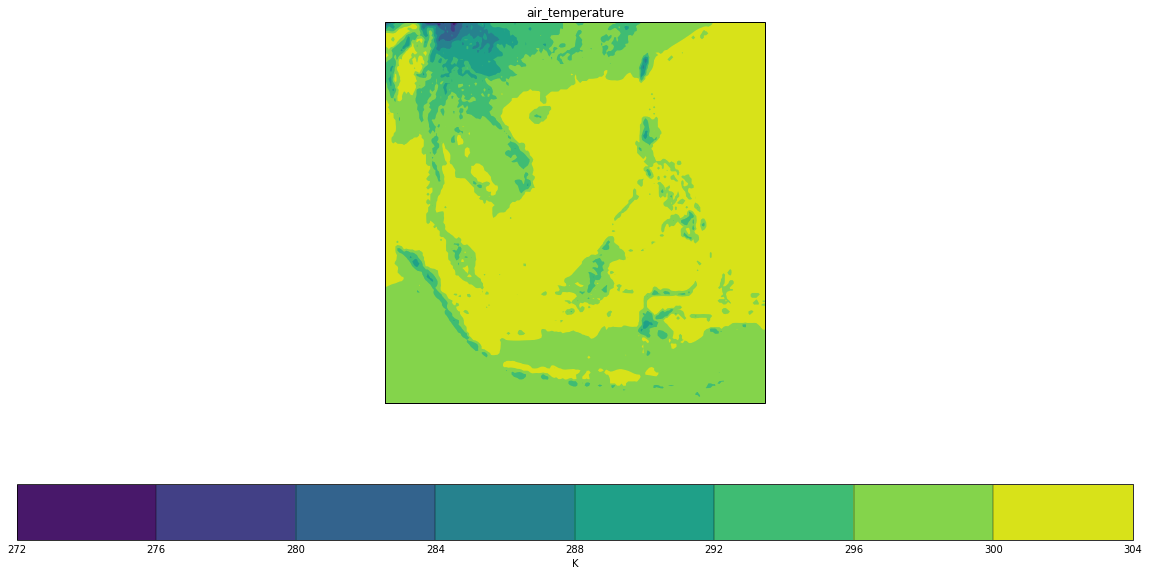

In [3]:
# set figure size
plt.figure(figsize=(20,10))

# A contour plot of this variable
qplt.contourf(cube)
plt.title(cube.name())
plt.show()

***
<a id='1.3'></a>
## 1.3 Rim removal (single file example)

The edges (or rim) of RCM outputs are biased due to the linear relaxation used on certain variables to apply the GCM lateral boundary conditions at the RCM's finer resolution. This rim from each edge needs to be excluded from any analysis.

The practise PP files are 25km resolution so have an 8-point rim. The following code demonstrates how to remove the 8-point rim from all data in a specified pp file data directory.

<div class="alert alert-block alert-success">
<b>Question:</b> Read through the code below.  Identify the parts of the code that:<br>

- Sets the input data directory <br>
- Specifies the output file names<br>
</div>

**j)** Remove the 8 point rim from each raw pp file and save the 'rim-removed' files in NetCDF format. <br>

To run the code, click in the box and press <kbd>Ctrl</kbd> + <kbd>Enter</kbd>.

In [11]:
datadir = '/project/precis/worksheets/data'

for runid in ['cahpa', 'cahpb']:
    ppdir = os.path.join(datadir, 'pp', runid)
    
    # find all the files from which to remove the rim
    file_list = glob.glob(ppdir + '/*.pp')

    for f in file_list:
        # This will load all the variables in the file into a CubeList
        datacubes = iris.load(f)
        tempcubelist = []
        for cube in datacubes:
            temprimcubelist = []
            # In case the data are more than 2 dimensional, grab a 2d slice
            for yx_slice in cube.slices(['grid_latitude','grid_longitude']):
                norimcube = yx_slice[8 : -8 , 8 : -8]
                temprimcubelist.append(norimcube)
            # Merge the individual 2d slices into a single cube
            trimmedcube = iris.cube.CubeList(temprimcubelist).merge_cube()
            tempcubelist.append(trimmedcube)
        # Write out the trimmed data file
        outfile = f.replace('.pp', '_norim.nc').replace('/pp/', '/netcdf/')
        iris.save(tempcubelist, outfile)


/project/precis/worksheets/data/netcdf/cahpa


PermissionError: [Errno 13] Permission denied: b'/project/precis/worksheets/data/netcdf/cahpa/cahpaa.pmi2feb_norim.nc'

***
<a id='1.4'></a>
## 1.4 Select variables

In these worksheets, the monthly data files contain multiple variables; we can use Iris to separate the variables and save them as seperate netCDF files.

**k)** **Separate each variable** into its own directory.

Click in the box below and press <kbd>Ctrl</kbd> + <kbd>Enter</kbd> to run the code.

In [12]:
for runid in ['cahpa', 'cahpb']:    
    netcdfdir = os.path.join(datadir, 'netcdf', runid)

    file_list = glob.glob(netcdfdir + '/*.nc')

    for f in file_list:
        # This will load all the variables in the file into a CubeList
        datacubes = iris.load(f)

        for cube in datacubes:

            # get the STASH code
            cubeSTASH = cube.attributes['STASH'] 

            # create a directory based on the STASH code
            dirname = str(cubeSTASH.section).zfill(2)+str(cubeSTASH.item).zfill(3)

            # checks if directory exists, if not; creates a directory
            if not os.path.exists(os.path.join(netcdfdir, dirname)):
                os.mkdir(os.path.join(netcdfdir, dirname))

            # save the individual variable
            iris.save(cube, os.path.join(netcdfdir, dirname, os.path.basename(f)))

PermissionError: [Errno 13] Permission denied: b'/project/precis/worksheets/data/netcdf/cahpa/16222/cahpaa.pmi2aug_norim.nc'

**l)** For each variable (Temperature, Precipitation, Surface Pressure) **concatenate** (i.e. combine) the monthly files into a single cube and save as one file.

Click in the box below and press <kbd>Ctrl</kbd> + <kbd>Enter</kbd> to run the code.


In [4]:
#Dictionary of stash codes and associated variable names 
stash_codes = {'03236':'tm',
               '05216':'pr',
               '16222': 'pmsl'}

for runid in ['cahpa', 'cahpb']:    
    netcdfdir = os.path.join(datadir, 'netcdf', runid)
    # loop over each stash code directory
    for stash in stash_codes.keys():
        # load the file names into the variable file_list
        file_list = glob.glob(os.path.join(netcdfdir, stash, '*pmi*.nc'))

        cubelist = [] # an empty array to append the monthly cubes to
        for f in file_list:
            # There is only one cube so using single cube load function
            cubelist.append(iris.load_cube(f))

        # Merge all the cubes in the list created above
        mergedcube = iris.cube.CubeList(cubelist).merge_cube()

        outfile = os.path.join(netcdfdir, runid + '.pm.1981_1983.' + stash_codes[stash] + '.norim.nc')

        iris.save(mergedcube, outfile)
        
        print(outfile)

NameError: name 'datadir' is not defined

<div class="alert alert-block alert-info">
<b>Note:</b> Monthly files exist for the years 1981, 1982 and 1983, so the new file name specifies `<b>1981_1983</b>`.

<div class="alert alert-block alert-success">
<b>Question:</b> Use the <b>cd</b> and <b>ls</b> commands to check the NetCDF directory which you have been creating new files in. <br>
    Confirm that a new directory has been created for individual stash codes (variables). <br>
    Move into one of these directories and list the files within. <br>
    What is the size of the concatenated file (containing 1981-1983 data)?
</div>

In [6]:
# use %cd and %ls to list the contents of your new directory containing NetCDF files:


# use %cd to move into one of the stash directories:


# use %ls -lh to compare the size of the single-year files and the concatenated file: 



<b>Answer:</b><br>
*Size of the concatenated file:*

<b>This completes worksheet 1.</b> You have created pre-processed files (rim removed, individual variables, concenated over time, in NetCDF format). <br>
In worksheet 2, you will begin to analyse these files.

© Crown Copyright 2018, Met Office